In [8]:
# 匯入必要的函式庫
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# step.1 業務理解
# 目標：建立一個分類模型來根據隨機變數 (X) 預測二元結果 (Y)。

# step.2 數據理解
# 我們需要生成合成數據來模擬分類任務。

# 設置隨機種子以確保結果可重現
np.random.seed(0)

# 生成範圍在 [0, 1000] 之間的300個隨機變數
X = np.random.uniform(0, 1000, 300).reshape(-1, 1)

# 根據特定規則定義目標變量 Y
# 若 500 < X(i) < 800 則 Y(i) = 1，否則 Y(i) = 0
Y = np.where((X > 500) & (X < 800), 1, 0).ravel()

# step.3 數據準備
# 將特徵標準化，以改善模型表現，特別是SVM模型
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# step.4 模型構建
# 模型1：邏輯回歸
log_reg = LogisticRegression()
log_reg.fit(X_scaled, Y)
Y_pred_log_reg = log_reg.predict(X_scaled)

# 模型2：使用 RBF 核心的 SVM
svm_rbf_clf = SVC(kernel='rbf')
svm_rbf_clf.fit(X_scaled, Y)
Y_pred_svm_rbf = svm_rbf_clf.predict(X_scaled)

# step.5 評估
# 使用準確率和分類報告來評估模型
print("邏輯回歸準確率:", accuracy_score(Y, Y_pred_log_reg))
print("邏輯回歸分類報告:\n", classification_report(Y, Y_pred_log_reg))

print("使用 RBF 核心的 SVM 準確率:", accuracy_score(Y, Y_pred_svm_rbf))
print("使用 RBF 核心的 SVM 分類報告:\n", classification_report(Y, Y_pred_svm_rbf))

# 為了順利繪圖，將數據排序
X_sorted_indices = np.argsort(X.ravel())
X_sorted = X[X_sorted_indices]
X_scaled_sorted = X_scaled[X_sorted_indices]
Y_sorted = Y[X_sorted_indices]
Y_pred_log_reg_sorted = Y_pred_log_reg[X_sorted_indices]
Y_pred_svm_rbf_sorted = Y_pred_svm_rbf[X_sorted_indices]


邏輯回歸準確率: 0.49
邏輯回歸分類報告:
               precision    recall  f1-score   support

           0       0.60      0.72      0.66       203
           1       0.00      0.00      0.00        97

    accuracy                           0.49       300
   macro avg       0.30      0.36      0.33       300
weighted avg       0.41      0.49      0.45       300

使用 RBF 核心的 SVM 準確率: 1.0
使用 RBF 核心的 SVM 分類報告:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



step.6 視覺化 (部署步驟)

In [9]:
# 繪製實際數據和模型預測
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

圖1：邏輯回歸預測

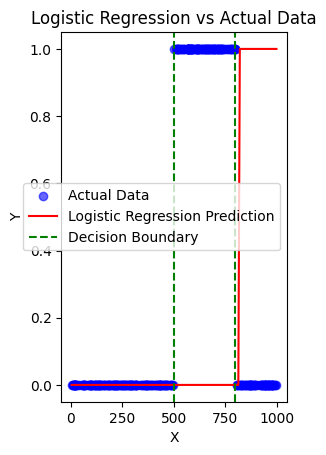

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(X_sorted, Y_sorted, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_sorted, Y_pred_log_reg_sorted, color='red', label='Logistic Regression Prediction')
plt.axvline(x=500, color='green', linestyle='--', label='Decision Boundary')
plt.axvline(x=800, color='green', linestyle='--')
plt.title('Logistic Regression vs Actual Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

圖2：使用 RBF 核心的 SVM 預測

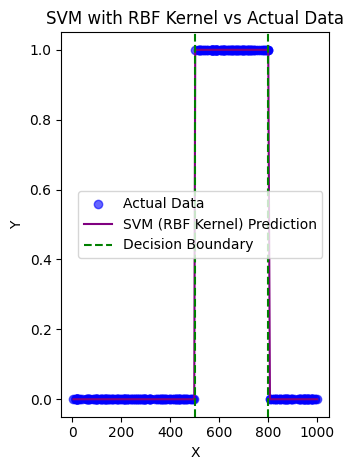

In [11]:
plt.subplot(1, 2, 2)
plt.scatter(X_sorted, Y_sorted, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_sorted, Y_pred_svm_rbf_sorted, color='purple', label='SVM (RBF Kernel) Prediction')
plt.axvline(x=500, color='green', linestyle='--', label='Decision Boundary')
plt.axvline(x=800, color='green', linestyle='--')
plt.title('SVM with RBF Kernel vs Actual Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()